In [1]:
import Spectrogram
from librosa.core import note_to_hz, cqt
from librosa.core import pseudo_cqt
import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
# parameters
# nargin = 6
bins = 24 # bins per octave
fs = 22050 # sampling rate
n_bins = 77
# fmax = 61.73541266 # same as 1 octave
fmax = 880*2
fmin = note_to_hz('C0')
thresh= 0.0054

stride = 512

duration = 10
s = np.linspace(0,1*duration,fs*duration)
y_list = np.load('./y_list.npy')
x = np.sin(2*np.pi*20*s, dtype=np.float32) + np.sin(2*np.pi*40*s, dtype=np.float32) \
    + np.sin(2*np.pi*60*s, dtype=np.float32) + np.sin(2*np.pi*80*s, dtype=np.float32) \
    + np.sin(2*np.pi*100*s, dtype=np.float32) + np.sin(2*np.pi*120*s, dtype=np.float32) 
# x = y_list.astype(np.float32)[:10]

# Pytorch

In [3]:
CQT_layer = Spectrogram.CQT2010(fs, stride, fmin, fmax=None, n_bins=24*3,
                        bins_per_octave=24,center=True,
                        pad_mode='reflect')

Getting arg done
keyFrequencies =  [0.0, 0.4995004995004996, 0.5005, 1.0]
Getting lowpass_filter done
downsample_count1 =  5
downsample_count2 =  7
downsample_count =  5
Can do early downsample, factor =  32
new sr =  689.0625
new hop_length =  16
keyFrequencies =  [0.0, 0.03033980582524272, 0.0321875, 1.0]
Getting cqt kernel done, n_fft =  512
Getting FFT kernel done


In [4]:
cqt_torch0 = CQT_layer(torch.tensor(x))

downsample True or not? True
torch.Size([1, 1, 6891])
First CQT done
0
torch.Size([1, 1, 3445])
1
torch.Size([1, 1, 1722])


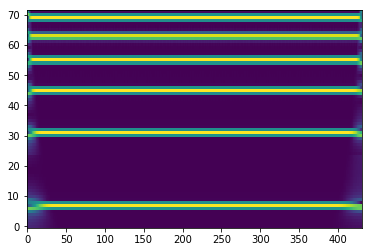

In [5]:
plt.imshow(cqt_torch0[0].numpy(),aspect='auto', origin='lower')
# plt.tick_params(labelsize=16)

In [6]:
CQT_layer2 = Spectrogram.CQT2010(fs, stride, fmin, fmax=None, n_bins=24*3,
                        bins_per_octave=24,center=True,
                        pad_mode='reflect', earlydownsample=False)
cqt_torch1 = CQT_layer2(torch.tensor(x))

Getting arg done
keyFrequencies =  [0.0, 0.4995004995004996, 0.5005, 1.0]
Getting lowpass_filter done
Getting cqt kernel done, n_fft =  16384
Getting FFT kernel done
downsample True or not? False
First CQT done
0
torch.Size([1, 1, 110250])
1
torch.Size([1, 1, 55125])


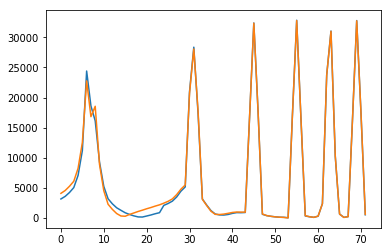

In [9]:
plt.plot(cqt_torch0[0].numpy()[:,10])
plt.plot(cqt_torch1[0].numpy()[:,10])

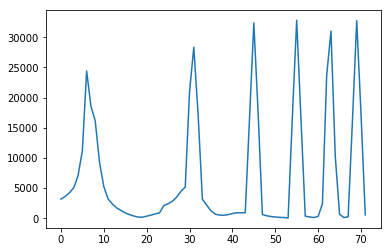

In [10]:
plt.plot(cqt_torch0[0].numpy()[:,10])

# Librosa

In [11]:
from librosa.core import cqt

In [12]:
cqt_lib = pseudo_cqt(x, hop_length=512, fmin=fmin, n_bins=24*3, bins_per_octave=24)

ValueError: range() arg 3 must not be zero

In [23]:
psudeo_cqt_lib = pseudo_cqt(x, hop_length=512, fmin=fmin, n_bins=24*3, bins_per_octave=24)

ValueError: range() arg 3 must not be zero

In [ ]:
plt.imshow(abs(cqt_lib),aspect='auto', origin='lower')

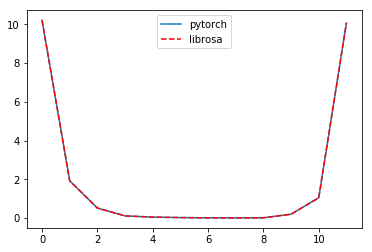

In [12]:
plt.plot(abs(cqt_lib)[:,10])
plt.plot(abs(cqt_lib)[:,10], 'r--')
plt.legend(['pytorch', 'librosa'])